In [1]:
import RTBridge as rtb
import numpy as np
from functions import *
from scipy.signal import stft
import scipy.signal as signal
import math
from scipy.io import wavfile
import matplotlib.pyplot as plt
import wave
from sklearn.preprocessing import MinMaxScaler

In [7]:
temp = np.ones(100)
activation = np.ones((4,500))*0.05
array = [1,0,3,2]
for k in range(4):

    activation[array[k],k*100:(k+1)*100] = temp

np.savetxt('./Activations/prescribed_activation.txt',activation)

In [2]:

# Babbling
Experiment_ID = '02'
babbling_duration = 30
fs = 100


In [3]:

pxiWin10 = "169.254.172.223:5555"
pubPort = "5557"
bridge = rtb.BridgeSetup(pubPort, pxiWin10, rtb.setups.hand_4_4, milliTimeStep= int(10))


Python Subscriber connection successful!
Python Publisher connection successful!


In [4]:

activations = systemID_input_gen_func(babbling_duration, fs,0.5,0.05,1)
np.savetxt('activations'+Experiment_ID+'.txt', activations)

bridge.startConnection()
excursions = []
returned_excursions = []

_ = bridge.sendAndReceive([0.05]*4, 2)

for activation_set in activations:
	returned_excursions = bridge.sendAndReceive(activation_set)
	excursions.append(returned_excursions.copy())

_ = bridge.sendAndReceive([0.05]*4, 2)

print("\n\nTest has completed")


completed Startup


Test has completed


In [4]:

#training
logdir= './Music2.wav'
fs, preprocessed_music1 = music_preprocessing(logdir,clipping=False)   
spect_shape = (525,19*100) # (number of frequency samples,number of time samples)
music_spect_target = spect_preprocessing(logdir,clipping=True, spect_shape= spect_shape,duration=19)


In [3]:
#babbling data loading
logdir = './Babblings/Babbling_01.wav'
fs, preprocessed_music2 = music_preprocessing(logdir,clipping=False)   
spect_shape = (525,30000)
music_spect_Babbling = spect_preprocessing(logdir,clipping=True, spect_shape= spect_shape,duration= 305)
music_spect_Babbling = music_spect_Babbling[200:,:]

/Users/hesamazad/Downloads/PhD/Piano Hand Project/new works/functions.py:40: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x = wavfile.read(file)


In [5]:
Experiment_ID = '01'
# inverse map 
logdir = './activations'+Experiment_ID+'.txt'
limb_activations = np.loadtxt(logdir)
limb_activations = limb_activations[200:,:]

In [6]:

model = inverse_mapping_func(music_spect_Babbling,limb_activations,0.2)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/10


2023-04-03 19:05:43.750140: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-03 19:05:43.750249: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-04-03 19:05:43.876796: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  1/745 [..............................] - ETA: 4:37 - loss: 0.8579 - mse: 0.0887

2023-04-03 19:05:44.075930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


740/745 [============================>.] - ETA: 0s - loss: 0.5668 - mse: 0.0740

2023-04-03 19:05:48.483302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


745/745 [==============================] - 5s 7ms/step - loss: 0.5668 - mse: 0.0740 - val_loss: 0.6198 - val_mse: 0.1016
Epoch 2/10
745/745 [==============================] - 5s 6ms/step - loss: 0.5618 - mse: 0.0726 - val_loss: 0.6153 - val_mse: 0.0997
Epoch 3/10
745/745 [==============================] - 5s 6ms/step - loss: 0.5612 - mse: 0.0724 - val_loss: 0.6196 - val_mse: 0.1028
Epoch 4/10
745/745 [==============================] - 5s 6ms/step - loss: 0.5606 - mse: 0.0722 - val_loss: 0.6202 - val_mse: 0.1025
Epoch 5/10
745/745 [==============================] - 5s 6ms/step - loss: 0.5600 - mse: 0.0719 - val_loss: 0.6243 - val_mse: 0.1049
Epoch 6/10
745/745 [==============================] - 5s 6ms/step - loss: 0.5598 - mse: 0.0719 - val_loss: 0.6176 - val_mse: 0.1018
Epoch 7/10
745/745 [==============================] - 5s 6ms/step - loss: 0.5593 - mse: 0.0717 - val_loss: 0.6249 - val_mse: 0.1053
Epoch 8/10
745/745 [==============================] - 5s 6ms/step - loss: 0.5590 - mse:

In [12]:
x = model.predict(music_spect_Babbling)

932/932 [==============================] - 2s 2ms/step


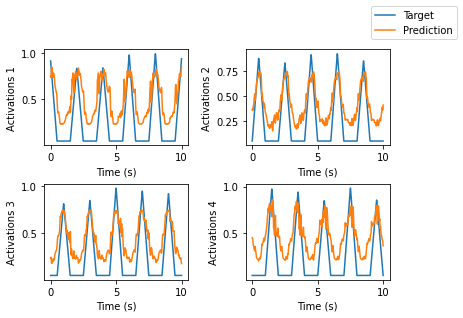

In [39]:
for k in range(4):
    t = np.linspace(0,10,1000)
    plt.subplot(2,2,k+1)
    plt.plot(t,limb_activations[0:1000,k],label= 'Target')
    plt.plot(t,1.8*x[80:1080,k],label= 'Prediction')
    plt.xlabel('Time (s)')
    plt.ylabel('Activations '+str(k+1))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

    if k==1:
        plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.5))
plt.show()

In [7]:

# Training initialization
pxiWin10 = "169.254.172.223:5555"
pubPort = "5557"
bridge = rtb.BridgeSetup(pubPort, pxiWin10, rtb.setups.hand_4_4, 10)


Python Subscriber connection successful!
Python Publisher connection successful!


In [10]:

predicted_limb_activations = 2*gen_activations_from_spect(music_spect_target,model)
bridge.startConnection()
_ = bridge.sendAndReceive([0.05]*4, 2)

excursions = []
returned_excursions = []
for activation_set in predicted_limb_activations[100:,:]:
	returned_excursions = bridge.sendAndReceive(activation_set)
	excursions.append(returned_excursions.copy())

_ = bridge.sendAndReceive([0.05]*4, 2)


print("\n\nTest has completed")

60/60 [==============================] - 0s 2ms/step
completed Startup


Test has completed


In [ ]:
#training    
logdir = './Training1.wav'
fs, preprocessed_music3 = music_preprocessing(logdir,clipping=True,duration=28)   
spect_shape = (525,2800)
music_spect_training = spect_preprocessing(logdir,clipping=True, spect_shape= spect_shape,duration=28)

# concatenate
limb_activations = np.concatenate((limb_activations,predicted_limb_activations))
music_spect = np.concatenate((music_spect_Babbling,music_spect_training))

# new map
model = inverse_mapping_func(music_spect,limb_activations,0.2)


# This needs to be tested

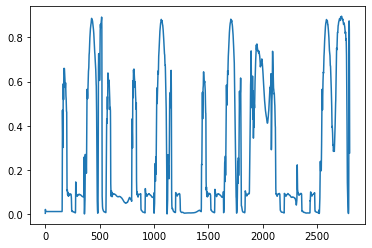

In [19]:
plt.plot(predicted_limb_activations[:,0])

In [3]:
fs, music = wavfile.read('./output2.wav')
f,t,Sxx = stft(music,fs,'hann',nfft= 2048)

In [8]:
Sxx = spect_preprocessing('./output2.wav',True,500,5)

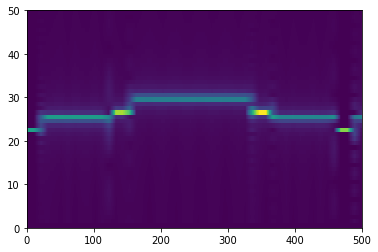

In [13]:
plt.pcolormesh(np.transpose(abs(Sxx))[0:50,:])

In [34]:
import pyaudio
import mido
import wave
import struct
import time
import numpy as np
import datetime

def note_to_freq(note, concert_A=440.0):
    f = (2.0 ** ((note - 69) / 12.0)) * concert_A
    return f

# Set up MIDI input
#midi_in = mido.open_input('LPK25 0') #Windows
midi_in = mido.open_input('LPK25') #Mac

# Set up audio recording
FORMAT = pyaudio.paInt16
CHANNELS = 1  # mono recording
RATE = 44100  # sample rate
RECORD_SECONDS = 60  # recording duration in seconds
WAVE_OUTPUT_FILENAME = 'output2.wav'
total_duration = 0

# Initialize PyAudio object
audio = pyaudio.PyAudio()

stream = audio.open(format=FORMAT, channels=CHANNELS, rate=RATE, output=True)

# Start recording and listening for MIDI input
print('Starting recording and MIDI input...')
midi_messages = []

while True:
    # Check for MIDI input
    for msg in midi_in.iter_pending():
        print(msg)
        if msg.type == 'note_on':
             start = datetime.datetime.now()
             print(msg)
        elif msg.type == 'note_off':
            end = datetime.datetime.now()
            end = end.minute*60 + end.second+end.microsecond/1000000
            start = start.minute*60 + start.second+start.microsecond/1000000
            duration = end - start            
            msg.time = duration
            total_duration += duration
        midi_messages.append(msg)

    if total_duration>RECORD_SECONDS:
        break

midi_in.close()   


audio = pyaudio.PyAudio()

stream = audio.open(format=FORMAT, channels=CHANNELS, rate=RATE, output=True)
print('Starting recording and MIDI input...')
audio_frames = []

for msg in midi_messages:
    if msg.type == 'note_on':

        note = msg.note
        velocity = msg.velocity
        frequency = note_to_freq(note)
        amplitude = velocity / 127.0
    elif msg.type == 'note_off':
        duration = msg.time
        t = 0
        while t < duration:
            y = amplitude * np.sin(2 * np.pi * frequency * t)
            data = struct.pack('<h', int(y * 32767))
            audio_frames.append(data)
            stream.write(data)
            t += 1.0 / RATE



# Stop audio stream
stream.stop_stream()
stream.close()
audio.terminate()

# Open wave file for writing
wave_file = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wave_file.setnchannels(CHANNELS)
wave_file.setsampwidth(audio.get_sample_size(FORMAT))
wave_file.setframerate(RATE)
wave_file.writeframes(b''.join(audio_frames))
wave_file.close()

print(f'Recording saved as {WAVE_OUTPUT_FILENAME}.')


Starting recording and MIDI input...
note_on channel=0 note=50 velocity=80 time=0
note_on channel=0 note=50 velocity=80 time=0
note_off channel=0 note=50 velocity=127 time=0
note_on channel=0 note=52 velocity=41 time=0
note_on channel=0 note=52 velocity=41 time=0
note_off channel=0 note=52 velocity=127 time=0
note_on channel=0 note=53 velocity=21 time=0
note_on channel=0 note=53 velocity=21 time=0
note_off channel=0 note=53 velocity=127 time=0
note_on channel=0 note=55 velocity=68 time=0
note_on channel=0 note=55 velocity=68 time=0
note_off channel=0 note=55 velocity=127 time=0
note_on channel=0 note=53 velocity=60 time=0
note_on channel=0 note=53 velocity=60 time=0
note_off channel=0 note=53 velocity=127 time=0
note_on channel=0 note=52 velocity=86 time=0
note_on channel=0 note=52 velocity=86 time=0
note_off channel=0 note=52 velocity=127 time=0
note_on channel=0 note=50 velocity=97 time=0
note_on channel=0 note=50 velocity=97 time=0
note_off channel=0 note=50 velocity=127 time=0
note

KeyboardInterrupt: 

In [3]:
sxxx = spect_preprocessing('./www2.wav',True,6000,60)

/Users/hesamazad/Documents/GitHub/MusicianHand/functions.py:92: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, music = wavfile.read(logdir)


0.9993224894216733

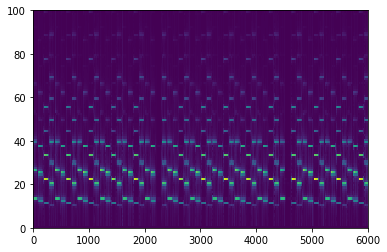

In [10]:
plt.pcolormesh(np.transpose(sxxx)[0:100,:])
np.max(np.max(sxxx,1))

In [24]:
for msg in midi_messages:
    print(msg)

note_on channel=0 note=57 velocity=80 time=0
note_off channel=0 note=57 velocity=127 time=0
note_on channel=0 note=59 velocity=57 time=0
note_off channel=0 note=59 velocity=127 time=1
note_on channel=0 note=60 velocity=74 time=0
note_off channel=0 note=60 velocity=127 time=3
note_on channel=0 note=59 velocity=80 time=0
note_off channel=0 note=59 velocity=127 time=1
note_on channel=0 note=59 velocity=77 time=0
note_off channel=0 note=59 velocity=127 time=3


In [29]:
x = datetime.datetime.now()
print(x.microsecond)

134192


In [11]:
activations = np.loadtxt('./Activations/Experiment_v0_03_activations.txt')

In [12]:

model = inverse_mapping_func(sxxx,activations,0.1)

2023-05-03 13:42:09.939355: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-03 13:42:09.942525: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/10


2023-05-03 13:42:11.051976: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-03 13:42:11.329982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


169/169 [==============================] - 2s 7ms/step - loss: 0.5242 - mse: 0.0944 - val_loss: 0.4813 - val_mse: 0.0853
Epoch 2/10
  1/169 [..............................] - ETA: 0s - loss: 0.4572 - mse: 0.0759

2023-05-03 13:42:13.168475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


169/169 [==============================] - 1s 6ms/step - loss: 0.4682 - mse: 0.0793 - val_loss: 0.4660 - val_mse: 0.0794
Epoch 3/10
169/169 [==============================] - 1s 6ms/step - loss: 0.4538 - mse: 0.0750 - val_loss: 0.4541 - val_mse: 0.0765
Epoch 4/10
169/169 [==============================] - 1s 6ms/step - loss: 0.4442 - mse: 0.0730 - val_loss: 0.4473 - val_mse: 0.0766
Epoch 5/10
169/169 [==============================] - 1s 5ms/step - loss: 0.4383 - mse: 0.0720 - val_loss: 0.4449 - val_mse: 0.0770
Epoch 6/10
169/169 [==============================] - 1s 6ms/step - loss: 0.4345 - mse: 0.0715 - val_loss: 0.4436 - val_mse: 0.0776
Epoch 7/10
169/169 [==============================] - 1s 6ms/step - loss: 0.4317 - mse: 0.0710 - val_loss: 0.4433 - val_mse: 0.0786
Epoch 8/10
169/169 [==============================] - 1s 6ms/step - loss: 0.4293 - mse: 0.0706 - val_loss: 0.4428 - val_mse: 0.0792
Epoch 9/10
169/169 [==============================] - 1s 5ms/step - loss: 0.4274 - mse:

In [14]:
pred_activations = model.predict(sxxx)


 73/188 [==========>...................] - ETA: 0s

2023-05-03 13:42:58.902444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 0s 2ms/step


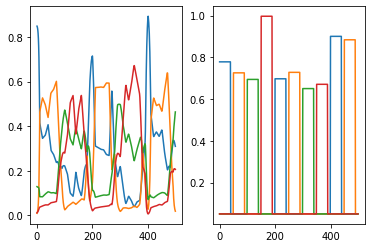

In [20]:
plt.subplot(1,2,1)

plt.plot(pred_activations[0:500,:])
plt.subplot(1,2,2)
plt.plot(activations[0:500,:])

/Users/hesamazad/Documents/GitHub/MusicianHand/functions.py:92: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, music = wavfile.read(logdir)
/Users/hesamazad/Documents/GitHub/MusicianHand/functions.py:122: RuntimeWarning: invalid value encountered in double_scalars
  normalized_matrix[i,j] = matrix[i,j]/max_abs_value
/var/folders/b9/n530p3715jz14d00bjmthznh0000gn/T/ipykernel_40301/3117093190.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(10*np.log10(txx))


22/22 [==============================] - 0s 5ms/step


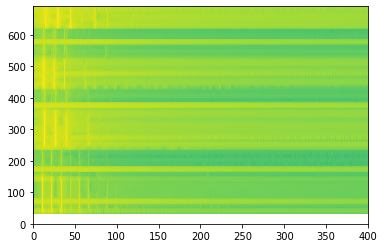

In [23]:
txx = spect_preprocessing('./target.wav',True,690,6.9)
plt.pcolormesh(10*np.log10(txx))
pred_act = model.predict(txx)

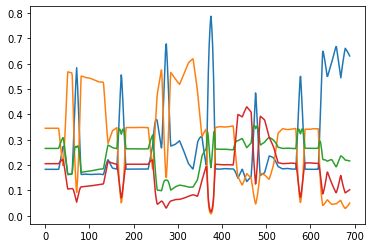

In [25]:
plt.plot(pred_act)
np.savetxt('./train_activations/activation_1.txt',pred_act)

In [7]:
activation = np.loadtxt('./Activations/Experiment_v0_03_activations.txt')

/var/folders/b9/n530p3715jz14d00bjmthznh0000gn/T/ipykernel_47105/4262024403.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, music = wavfile.read('./www2.wav')
/var/folders/b9/n530p3715jz14d00bjmthznh0000gn/T/ipykernel_47105/4262024403.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(10*np.log10(np.abs(sxx)))


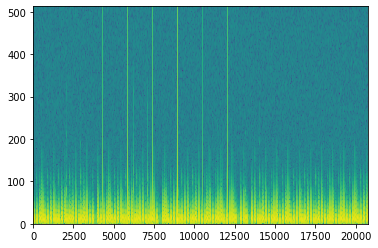

In [10]:
fs, music = wavfile.read('./www2.wav')
music = music[:,1]
f,t,sxx = stft(music,fs,'hann',nfft=1024)
plt.pcolormesh(10*np.log10(np.abs(sxx)))

sxx = np.abs(sxx)[0:500,]

In [4]:
def spect_preprocessing5(logdir,clipping,spect_length,duration=None):

    fs, music = wavfile.read(logdir)
    #x = music[:,0]
    x = music

    if clipping == True:
        N = int((np.shape(x)[0]-duration*fs))
        x= x[0:-N]
    music = x
    samples_number = int(fs*0.1)
    epochs_number = int(np.shape(music)[0]/samples_number)

    fft_matrix = stft(music,fs,'hann',nfft = 1024)


    matrix = fft_matrix[1:,0:200]
        #max_abs_values = [max([abs(element) for element in row]) for row in matrix]
    max_abs_value = max([abs(element) for row in matrix for element in row])

    normalized_matrix = np.zeros_like(matrix)

    for i in range(np.shape(matrix)[0]):
        for j in range(np.shape(matrix)[1]):
            normalized_matrix[i,j] = matrix[i,j]/max_abs_value
            #normalized_matrix = matrix
  
    spect_shape = (spect_length,np.shape(normalized_matrix)[1])
    resampled_array = np.zeros(spect_shape)
    for k in range(np.shape(normalized_matrix)[1]):
        resampled_array[:,k] = np.interp(np.linspace(0, 1, spect_shape[0]), np.linspace(0, 1, np.shape(normalized_matrix)[0]), normalized_matrix[:,k])

            #resampled_array = np.transpose(resampled_array)

    return resampled_array

In [5]:
sxx = spect_preprocessing5('./www2.wav',True,6000,60)

/var/folders/b9/n530p3715jz14d00bjmthznh0000gn/T/ipykernel_44124/2656545005.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, music = wavfile.read(logdir)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 2, using nperseg = 2
  warnings.warn('nperseg = {0:d} is greater than input length '


/var/folders/b9/n530p3715jz14d00bjmthznh0000gn/T/ipykernel_45587/2761137623.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t,f[0:500],10*np.log10(np.abs(Sxx))[0:500,:])


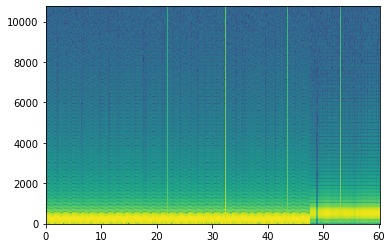

In [7]:
fs, music = wavfile.read('./output2.wav')

f,t,Sxx = stft(music,fs,'hann',nfft=2048)
plt.pcolormesh(t,f[0:500],10*np.log10(np.abs(Sxx))[0:500,:])

In [1]:
from functions import spect_preprocessing
import matplotlib.pyplot as plt
import numpy as np

/Users/hesamazad/Documents/GitHub/MusicianHand/functions.py:92: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, music = wavfile.read(logdir)


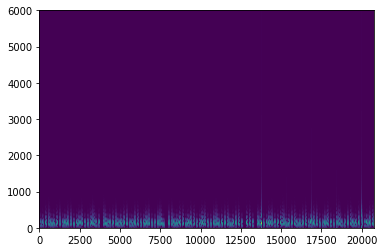

In [3]:
Sxx = spect_preprocessing('./www2.wav',6000)
plt.pcolormesh(Sxx)

In [3]:
from scipy.signal import stft
from scipy.io import loadmat
import tensorflow as tf
import numpy as np
from re import L
from random import sample
import os
import pickle
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import activation,Dense
import math
import zmq
import RTBridge as rtb
from scipy.io import wavfile
import scipy.signal as signal
from keras import backend as K
from scipy.stats import beta
from scipy.fft import fft
import pyaudio
import mido
import wave
import struct
import time
def spect_preprocessing(logdir,spect_length):

    fs, music = wavfile.read(logdir)
    music = music[:,1]
    i1 = find_first_index(music)
    i2 = find_last_index(music[i1:],i1,fs)
    music = music[i1:i2]
    f,t, Sxx = stft(music,fs,'hann',nfft=1024)
    matrix = np.abs(Sxx)
    max_abs_value = max([abs(element) for row in matrix for element in row])
    normalized_matrix = np.zeros_like(matrix)

    for i in range(np.shape(matrix)[0]):
        for j in range(np.shape(matrix)[1]):
            if max_abs_value != 0:
                normalized_matrix[i,j] = matrix[i,j]/max_abs_value
  
    spect_shape = (np.shape(normalized_matrix)[0],spect_length)
    resampled_array = np.zeros(spect_shape)
    
    for k in range(np.shape(normalized_matrix)[0]):
        resampled_array[k,:] = np.interp(np.linspace(0, 1, spect_shape[1]), np.linspace(0, 1, np.shape(normalized_matrix)[1]), normalized_matrix[k,:])

    return resampled_array[:,:]

def find_last_index(arr,n,fs):
    avg = np.mean(np.abs(arr))
    count = 0
    for i in range(len(arr)):
        if np.abs(arr[i])< 0.5 * avg:
            count += 1
        else:
            count = 0       
        if count == int(fs/2):
            return i - fs+n+1
    return -1

def find_first_index(music):
    x = np.where(music>0)[0][0]
    return x

In [3]:
sxx = spect_preprocessing('./www2.wav',6000)


/Users/hesamazad/Documents/GitHub/MusicianHand/functions.py:92: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, music = wavfile.read(logdir)


In [4]:
fs, music = wavfile.read('./www2.wav')
music = music[:,1]
f,t,x = stft(music,fs,'hann',nfft = 1024)

/var/folders/b9/n530p3715jz14d00bjmthznh0000gn/T/ipykernel_48864/3860834447.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, music = wavfile.read('./www2.wav')


In [2]:
sxx = spect_preprocessing('./www2.wav',6000)

activation = np.loadtxt('./Activations/Experiment_v0_03_activations.txt')
model = inverse_mapping_func(np.transpose(sxx),activation,0.1)

In [47]:
import numpy as np
import random
def systemID_input_gen_func10(duration,fs,steps, min_input, max_input):
    
    samples_factor = int(fs*steps)
    number_of_values = int(duration/steps)
    limb_activations = np.ones((number_of_values,4))*min_input
    array = random.sample(range(4),4)
    for i in range(int(number_of_values/4)):
        idx = array[3]
        array[0] = idx
        while array[0]==idx:
            array = random.sample(range(4),4)


        for k in range(4):
            limb_activations[i*4+k,array[k]] = np.random.uniform(0.7,max_input,1)

    activations = np.ones((4,samples_factor*(number_of_values+1)))*min_input
    for i in range(4):
        activations_temp = np.ones(samples_factor)*min_input
        for j in range(number_of_values):
            y = np.ones(samples_factor)*limb_activations[j,i]
            activations_temp = np.concatenate((activations_temp,y))
        activations[i,:] = activations_temp
    return np.transpose(activations)



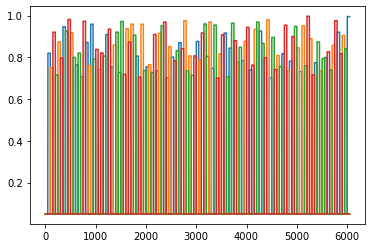

In [48]:
import matplotlib.pyplot as plt
plt.plot(systemID_input_gen_func10(60,100,0.5,0.05,1))

In [49]:
def train_test_split(x,y,test_size):
    n = x.shape
    n1 = int(np.round(n[0]*test_size))
    x_test = x[0:n1,:]
    y_test = y[0:n1,:]
    x_train = x[n1:-1,:]
    y_train = y[n1:-1,:]
    return x_train, y_train, x_test, y_test

In [50]:
def inverse_mapping_func(music_spect, limb_activations, test_size):# my version of this function
    x_train, y_train, x_test, y_test = train_test_split(music_spect,limb_activations,test_size)
    outputs = np.shape(limb_activations)[-1]
    layers = [
        Dense(units=50, input_shape =(np.shape(x_train[1],)), activation = "sigmoid"),
        Dense(units=4, input_shape=(50,),activation= "softmax"),

    ]
    model = Sequential(layers)
    model.compile(optimizer=tf.keras.optimizers.Adam(.001),loss='binary_crossentropy', metrics = ['mse'])
    model.fit(x_train,y_train, epochs=20,validation_data = (x_test,y_test))
    return model 

In [52]:
import tensorflow as tf
from keras import layers

def create_model(music_spect,limb_activations,test_size):

    x_train, y_train, x_test, y_test = train_test_split(music_spect,limb_activations,test_size)
    num_classes = np.shape(limb_activations)[-1]
    input_shape = np.shape(x_train)
    
    model = tf.keras.Sequential()
    
    # Add a 2D convolutional layer with 32 filters, a kernel size of (3, 3), and ReLU activation function
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    
    # Add a 2D max pooling layer with a pool size of (2, 2)
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Add another 2D convolutional layer with 64 filters and a kernel size of (3, 3), followed by a max pooling layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Add a third 2D convolutional layer with 128 filters and a kernel size of (3, 3), followed by a max pooling layer
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Add a flatten layer to transform the output of the convolutional layers to a 1D vector
    model.add(layers.Flatten())
    
    # Add a dense layer with 512 units and a ReLU activation function
    model.add(layers.Dense(512, activation='relu'))
    
    # Add a dense layer with 4*100=400 units and a sigmoid activation function
    model.add(layers.Dense(4*np.shape(y_train)[0], activation='sigmoid'))
    
    # Reshape the output to a matrix with shape (4, 100)
    model.add(layers.Reshape(np.shape(y_train)[0]))
    
    # Compile the model with mean squared error loss and the Adam optimizer
    model.compile(loss='mse',
                  optimizer='adam')
    model.fit(x_test,y_train)
    
    return model

In [ ]:
create_model()